### Customer Segmentation Clustering Example
##### Mall Customers Grouping Summary

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# reading the data frame
df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Standardize data, not normalize

col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()


,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


In [4]:
# handle Gender categorical using One-Hot

In [5]:
gender = df['Gender']
newdf = scaled_features.join(gender)

newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

newdf = newdf.drop(['Gender_Male'],axis=1)

newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,False
1,-1.738999,-1.281035,1.195704,False
2,-1.700830,-1.352802,-1.715913,True
3,-1.700830,-1.137502,1.040418,True
4,-1.662660,-0.563369,-0.395980,True


In [6]:
# Build Cluster and show

Text(0, 0.5, 'Inertia')

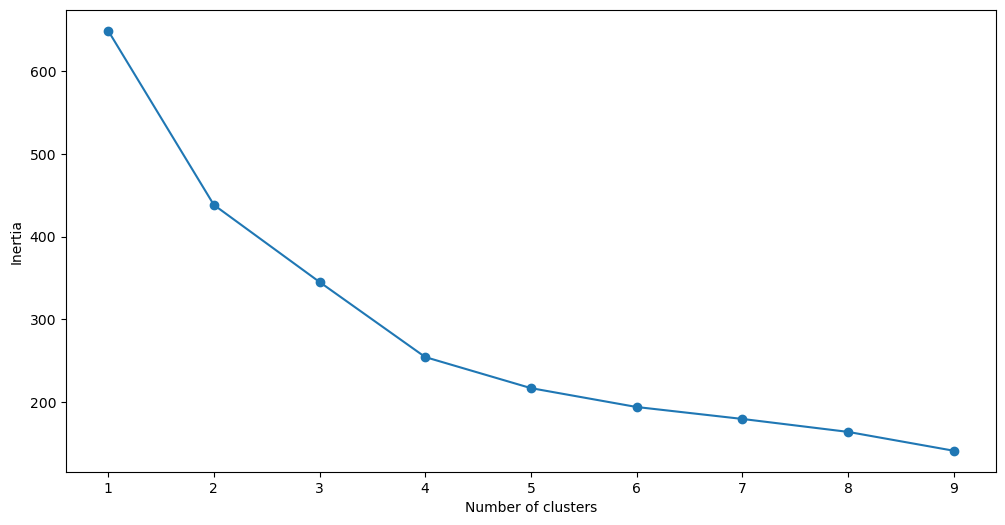

In [7]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_init='auto', n_clusters = cluster, init='k-means++')
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [8]:
# 5 clusters optimal?

# silhouette score to verify

In [9]:
# First, build a model with 5 clusters

kmeans = KMeans(n_init='auto', n_clusters = 5, init='k-means++')
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

0.34977050035201074


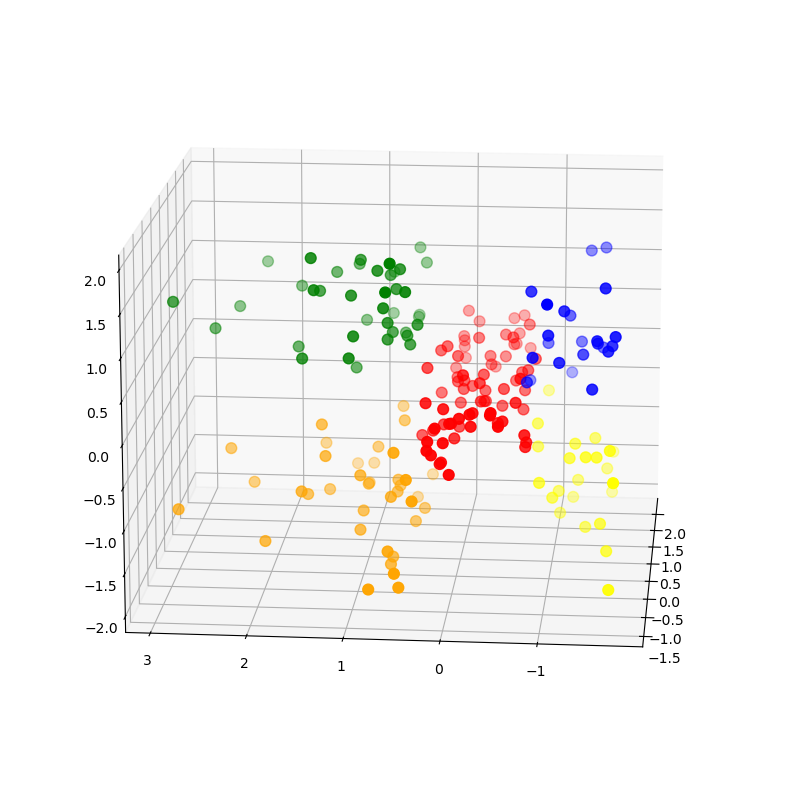

In [10]:
# Visualize clusters to see what is going on.

clusters = kmeans.fit_predict(df.iloc[:,2:])
newdf['label'] = clusters

fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)

ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)
ax.scatter(newdf.Age[newdf.label == 4], newdf["Annual Income (k$)"][newdf.label == 4], newdf["Spending Score (1-100)"][newdf.label == 4], c='yellow', s=60)

ax.view_init(15, 185)
plt.show()


In [11]:
# Improve separation with PCA to reduce dimensionality/features

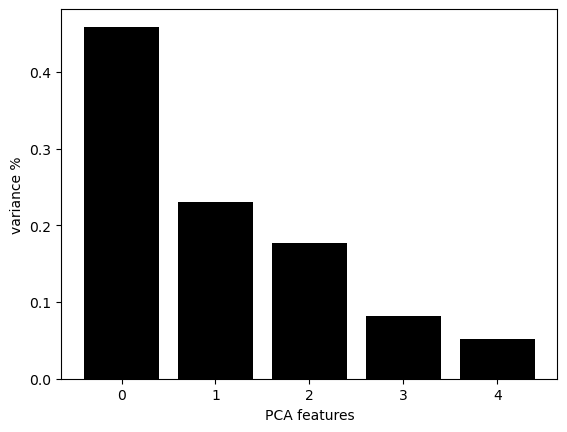

In [12]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [13]:
# Maybe use just first three components 0-2?

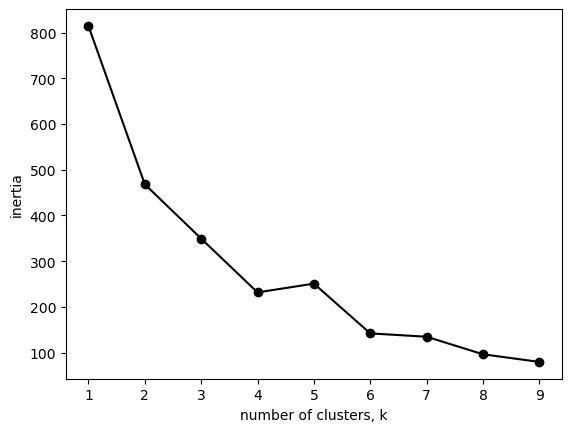

In [14]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_init='auto', n_clusters=k)
    model.fit(PCA_components.iloc[:,:3])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [15]:
# Maybe just 4 clusters? And just the first three features.

In [16]:
model = KMeans(n_init='auto', n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean'))

0.46707793572630396


In [17]:
# Much better, now visualize the clusters


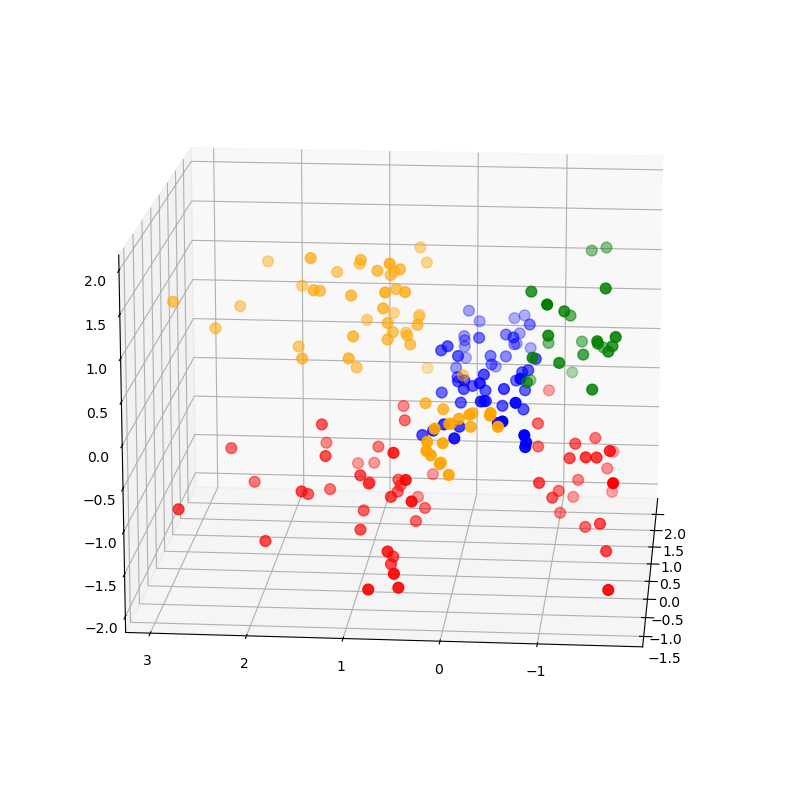

In [18]:
model = KMeans(n_init='auto', n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters

fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(15, 185)
plt.show()

In [19]:
# Cluster Analysis - Map the clusters back to the dataset and take a look at the data frame.

In [20]:
df = pd.read_csv('Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,1


In [21]:
# Compare average of all variables across each cluster:

In [22]:
avg_df = frame.groupby(['cluster'], as_index=False).mean(numeric_only=True)
avg_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,50.754386,53.578947,48.824561
1,1,42.200000,64.000000,19.233333
2,2,25.521739,26.304348,78.565217
3,3,29.300000,76.883333,71.600000


In [23]:
# Look at each of these features separately.

<Axes: xlabel='cluster', ylabel='Age'>

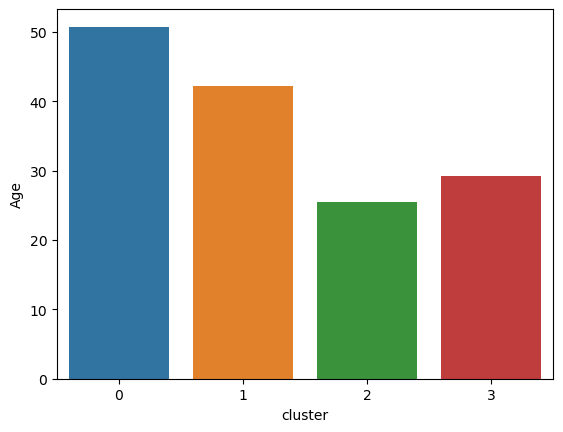

In [24]:
sns.barplot(x='cluster',y='Age',data=avg_df)

<Axes: xlabel='cluster', ylabel='Spending Score (1-100)'>

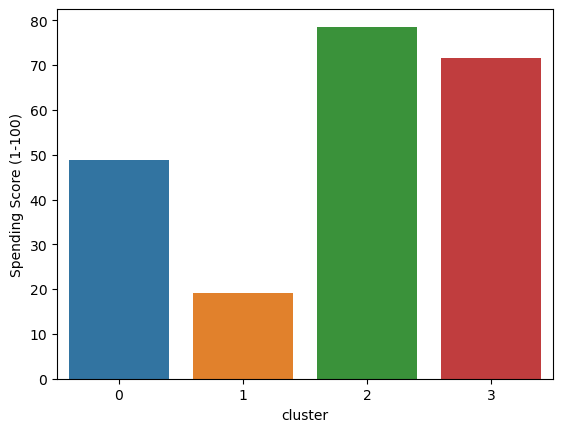

In [25]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

<Axes: xlabel='cluster', ylabel='Annual Income (k$)'>

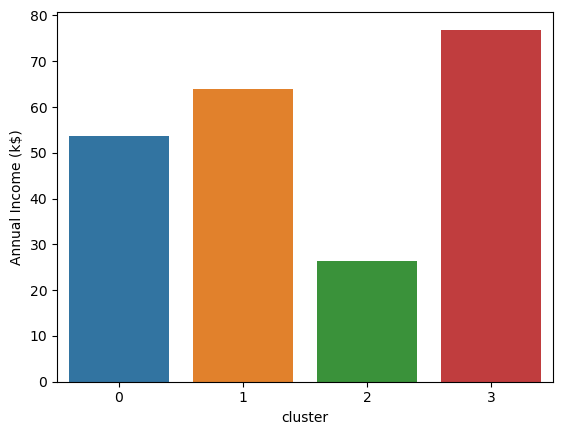

In [26]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

In [27]:
# Get average age in each cluster with avg income and avgspending

In [28]:
avg_df = frame.groupby(['cluster'], as_index=False).mean(numeric_only=True).round(1)
avg_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,50.8,53.6,48.8
1,1,42.2,64.0,19.2
2,2,25.5,26.3,78.6
3,3,29.3,76.9,71.6


In [30]:
# Conclusion

# Cluster 0: Older, mid income, mid spenders
# Cluster 1: Mid-life, high income, low spenders
# Cluster 2: Young, low income, high spenders
# Cluster 3: Young, high I\income, high spenders